## Xente Fraud Detection
Competition : https://zindi.africa/competitions/xente-fraud-detection-challenge

Problem statement: Create a machine learning model to detect fraudulent transactions.

Predict `FraudResult` probability

Evaluation: The error metric for this competition is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer your score is to 1, the better your model.

Column Name	Definition
- TransactionId - Unique ÔøΩtransaction identifier on platform
- BatchId - Unique number assigned to a batch of transactions for processing
- AccountId - Unique number identifying the customer on platform
- SubscriptionId - Unique number identifying the customer subscription
- CustomerId - Unique identifier attached to Account
- CurrencyCode - Country currency
- CountryCode - Numerical geographical code of country
- ProviderId - Source provider of Item ÔøΩbought.
- ProductId - Item name being bought.
- ProductCategory - ProductIds are organized into these broader product categories.
- ChannelId - Identifies if customer used web,Android, IOS, pay later or checkout.
- Amount - Value of the transaction. Positive for debits from customer account and negative for credit into customer account
- Value - Absolute value of the amount
- TransactionStartTime - Transaction start time
- PricingStrategy - Category of Xente's pricing structure for merchants
- FraudResult - Fraud status of transaction 1 -yes or 0-No

In [1]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Descriptive statistics
#     -Dimensions of the dataset.
#     -Peek at the data itself.
#     -Statistical summary of all attributes. 
#     -Breakdown of the data by the class variable.
# 3. Exploratory Data Analysis
#     -univarate analysis
#     -bivarate analysis
# 4. Data preprocessing
# a) Data Cleaning
# b) Feature Selection
# c) Data Transformation
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

In [2]:
# Load libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
# Load datasets
df_test = pd.read_csv('../data/raw/test.csv')
df_train = pd.read_csv('../data/raw/training.csv')

#### Descriptive statistics

In [6]:
# Dimensions of the dataset
df_test.shape

(45019, 15)

In [7]:
# Dimensions of the dataset
df_train.shape

(95662, 16)

In [8]:
# view data
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
# view data
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


The datasets contain a lot of categorical attributes and a few numerical attributes

In [10]:
# Statistical summary of numerical attributes.
df_test.describe()

,CountryCode,Amount,Value,PricingStrategy
count,45019.0,4.501900e+04,4.501900e+04,45019.000000
mean,256.0,4.632681e+03,1.030034e+04,2.260646
std,0.0,9.613215e+04,9.571010e+04,0.739666
min,256.0,-2.500000e+06,2.000000e+00,0.000000
25%,256.0,-5.000000e+01,5.000000e+02,2.000000
50%,256.0,1.000000e+03,1.200000e+03,2.000000
75%,256.0,5.000000e+03,5.200000e+03,2.000000
max,256.0,9.500000e+06,9.500000e+06,4.000000


In [11]:
df_train.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [12]:
# dataset attribute types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
TransactionId           45019 non-null object
BatchId                 45019 non-null object
AccountId               45019 non-null object
SubscriptionId          45019 non-null object
CustomerId              45019 non-null object
CurrencyCode            45019 non-null object
CountryCode             45019 non-null int64
ProviderId              45019 non-null object
ProductId               45019 non-null object
ProductCategory         45019 non-null object
ChannelId               45019 non-null object
Amount                  45019 non-null float64
Value                   45019 non-null int64
TransactionStartTime    45019 non-null object
PricingStrategy         45019 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.2+ MB


In [13]:
# dataset attribute types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


There are no null values in the datasets

In [14]:
# distribution by FraudResult
df_train.groupby('FraudResult').size()

FraudResult
0    95469
1      193
dtype: int64

In [15]:
# print percentage of fraud
(len(df_train.loc[df_train.FraudResult==1])) / (len(df_train.loc[df_train.FraudResult == 0])) * 100

0.20215986341115966

This contains an imbalanced set of records (0.20%), this will be treated with various method of handling imbalanced dataset

Combine Train and Test

Combining Train and Test datasets will save time, feature engineering steps will not be done twice.
A column will be added to help identify both datasets.

In [16]:
df_test['source'] = 'test'
df_train['source'] = 'train'

In [17]:
df_data = pd.concat([df_train,df_test], ignore_index=True)

In [18]:
df_data.shape

(140681, 17)

In [19]:
df_data.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value,source
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000,train
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20,train
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500,train
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800,train
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644,train


#### Exploratory Data Analysis

- <b>Univariate Analysis<b>

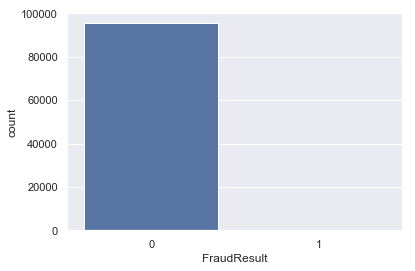

In [20]:
# Target variable: FraudResult
ax = plt.subplots()
sns.countplot(x='FraudResult', data=df_train);

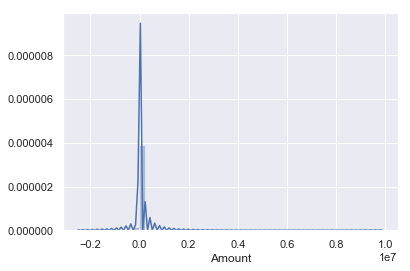

In [21]:
# Check numeric attribute Amount
ax = plt.subplots()
sns.distplot(df_data.Amount, kde=True);

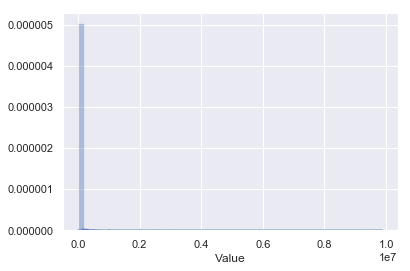

In [22]:
# Check numeric attribute Value
ax = plt.subplots()
sns.distplot(df_data.Value, kde=True);

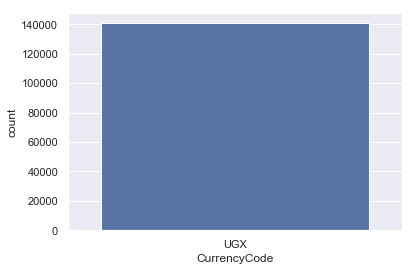

In [23]:
# Check categorical attribute CurrencyCode
ax = plt.subplots()
sns.countplot(x='CurrencyCode', data=df_data);

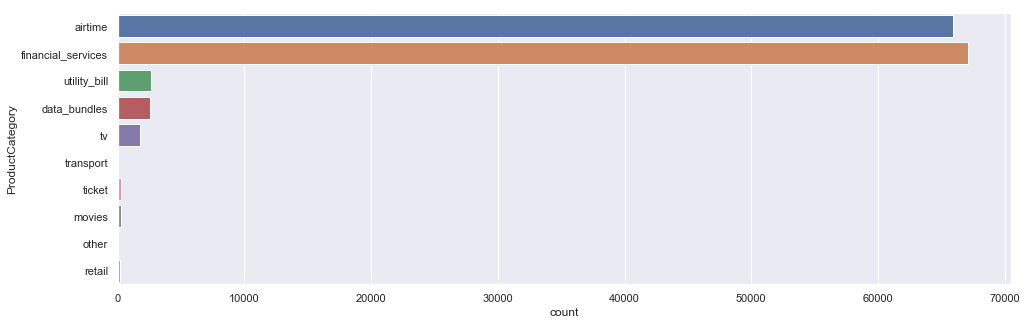

In [24]:
# Check categorical attribute ProductCategory
ax = plt.subplots(figsize=(16, 5))
sns.countplot(y='ProductCategory', data=df_data);

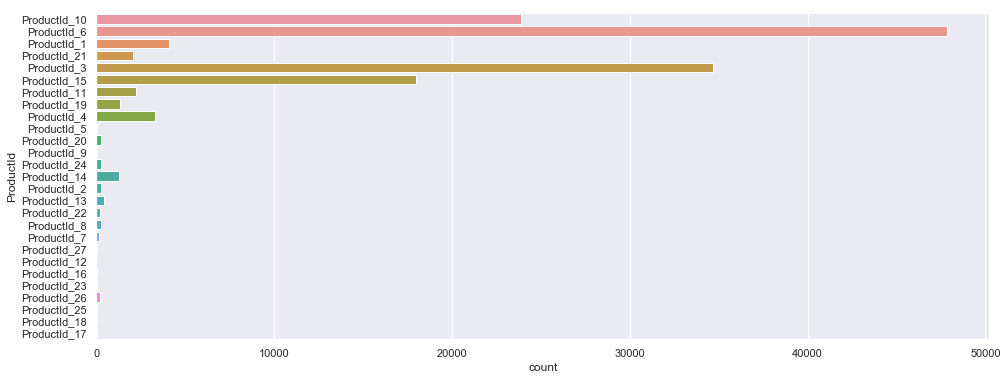

In [25]:
# Check categorical attribute ProductId
ax = plt.subplots(figsize=(16, 6))
sns.countplot(y='ProductId', data=df_data);

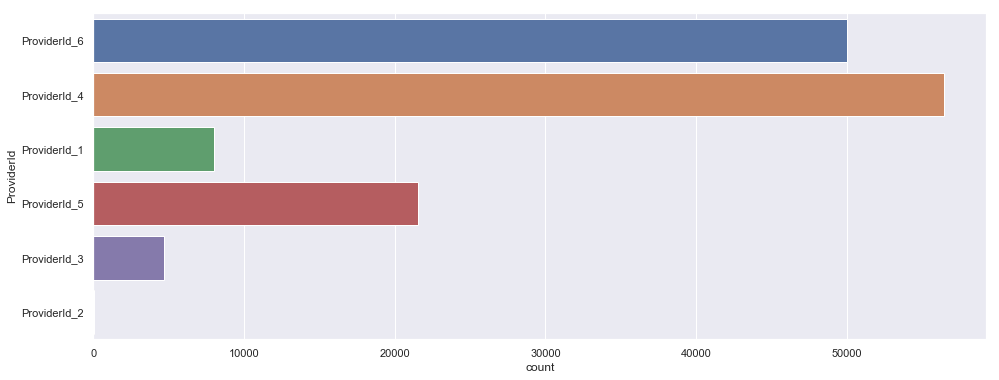

In [26]:
# Check categorical attribute ProviderId
ax = plt.subplots(figsize=(16, 6))
sns.countplot(y='ProviderId', data=df_data);

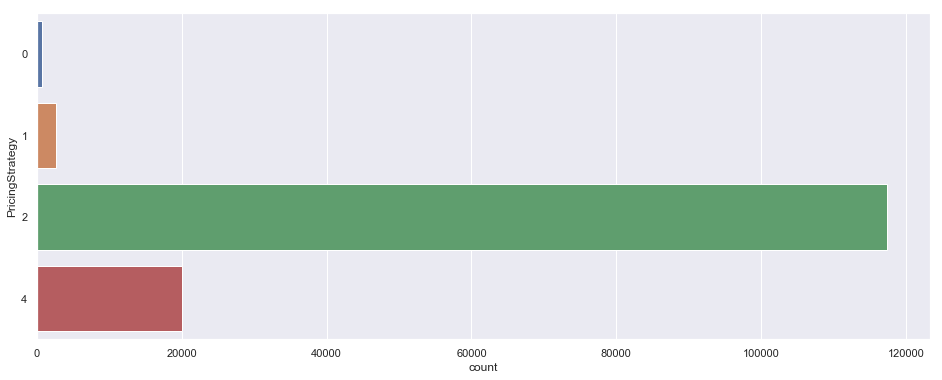

In [27]:
# Check categorical attribute PricingStrategy
ax = plt.subplots(figsize=(16, 6))
sns.countplot(y='PricingStrategy', data=df_data);

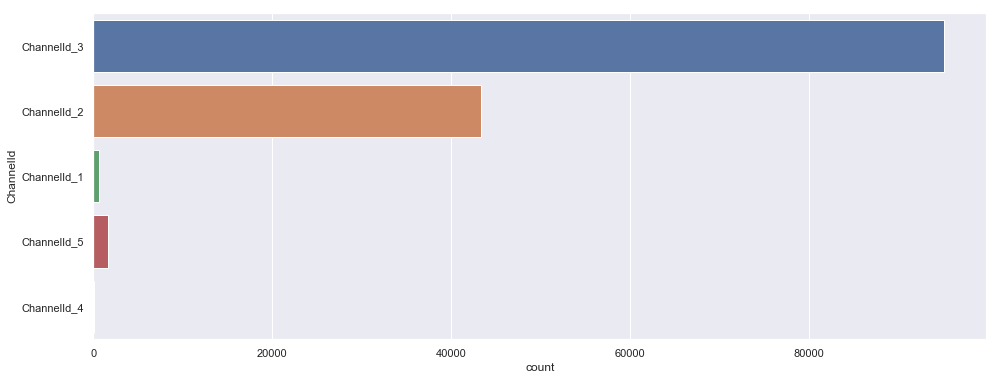

In [28]:
# Check categorical attribute ChannelId
ax = plt.subplots(figsize=(16, 6))
sns.countplot(y='ChannelId', data=df_data);

- <b>Bivariate Analysis<b>

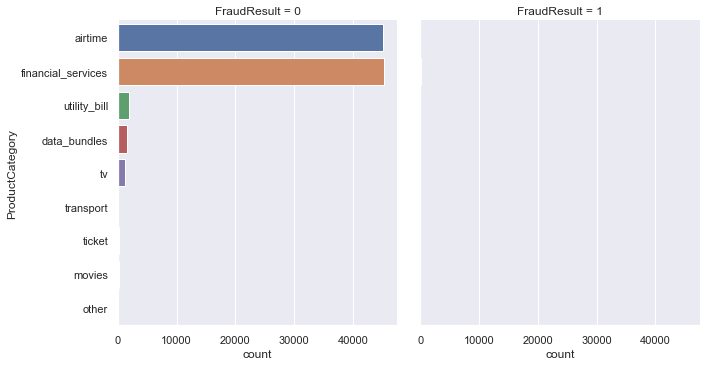

In [29]:
# Comparing the ProductCategory and FraudResult attributes
sns.factorplot(y='ProductCategory', col='FraudResult', kind='count', data=df_train);

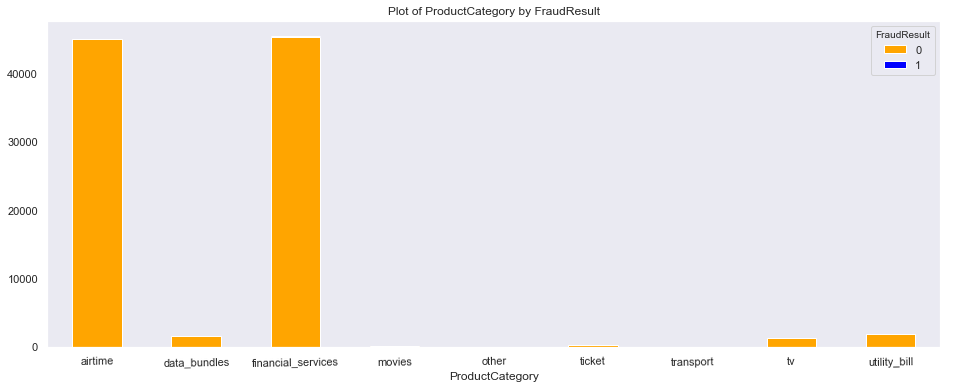

In [30]:
plot_data = pd.crosstab(df_train['ProductCategory'],df_train['FraudResult'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], rot=1, grid=False, figsize=(16,6), title='Plot of ProductCategory by FraudResult');


It will be good to have 3 categories "airtime", "financial_services" and "others".

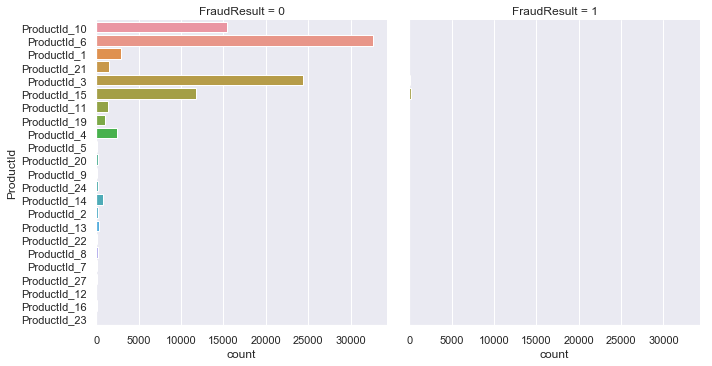

In [31]:
# Comparing the ProductId and FraudResult attributes
sns.factorplot(y='ProductId', col='FraudResult', kind='count', data=df_train);

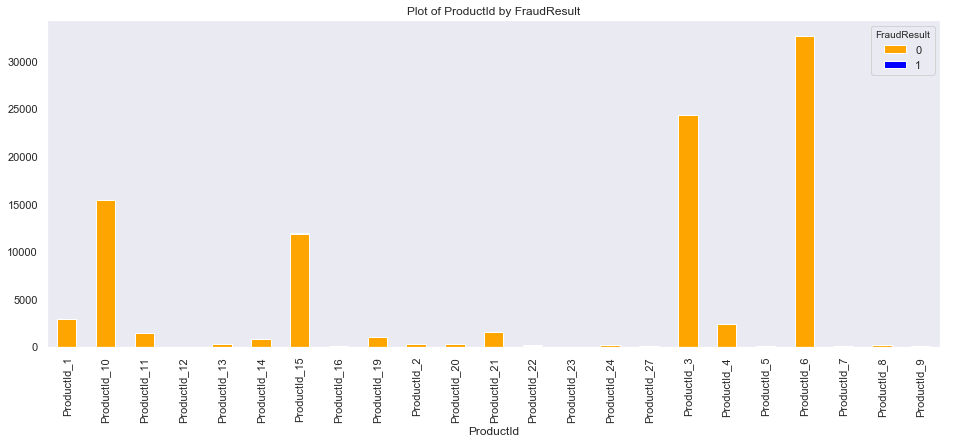

In [32]:
# Comparing the ProductId and FraudResult attributes
plot_data = pd.crosstab(df_train['ProductId'],df_train['FraudResult'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, figsize=(16,6), title='Plot of ProductId by FraudResult');


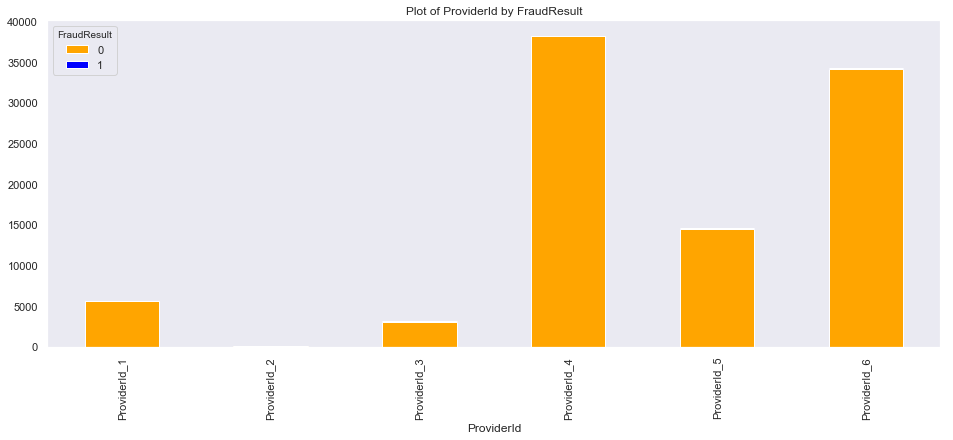

In [33]:
# Comparing the ProviderId and FraudResult attributes
plot_data = pd.crosstab(df_train['ProviderId'],df_train['FraudResult'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, figsize=(16,6), title='Plot of ProviderId by FraudResult');


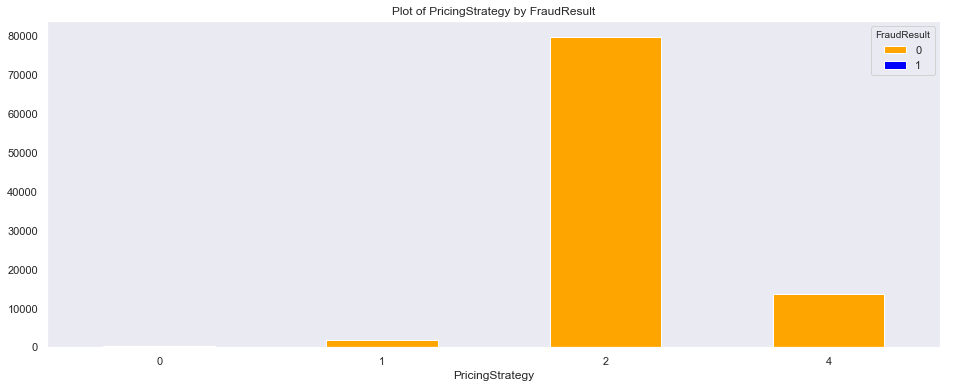

In [34]:
# Comparing the PricingStrategy and FraudResult attributes
plot_data = pd.crosstab(df_train['PricingStrategy'],df_train['FraudResult'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, rot=1,figsize=(16,6), title='Plot of PricingStrategy by FraudResult');


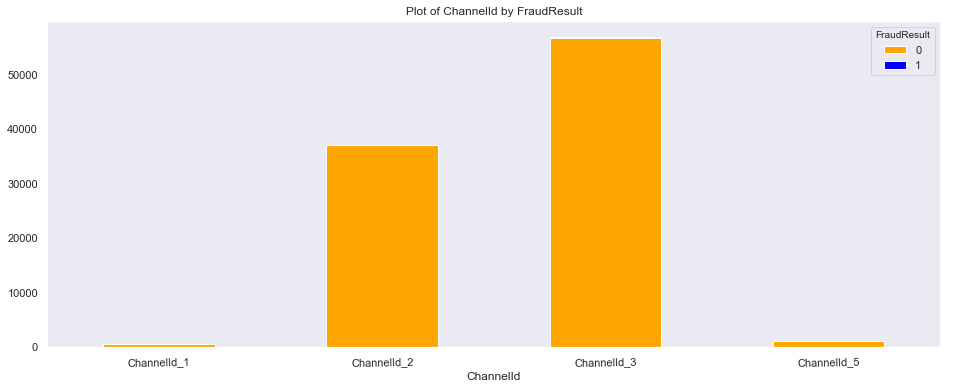

In [35]:
# Comparing the ChannelId and FraudResult attributes
plot_data = pd.crosstab(df_train['ChannelId'],df_train['FraudResult'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, rot=1,figsize=(16,6), title='Plot of ChannelId by FraudResult');


#### Data preprocessing

- <b>Data Transformation<b>

In [36]:
# One Hot Coding: Transform categorical attributes into binary variables
df_data_dum_var = pd.get_dummies(df_data[['ChannelId','ProductCategory','ProductId','ProviderId','PricingStrategy']], drop_first=True)
df_data_dum_var.head()

,PricingStrategy,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,...,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6
0,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
df_data.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value,source
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000,train
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20,train
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500,train
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800,train
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644,train


In [38]:
df_features = df_data_dum_var

In [39]:
df_features['Value'] = df_data['Value']

In [40]:
df_features['Amount'] = df_data['Amount']

In [41]:
df_features['FraudResult'] = df_data['FraudResult']

In [42]:
df_features['source'] = df_data['source']

In [43]:
df_features['value_log'] = np.log(df_data['Value'])

In [44]:
df_features_train = df_features[df_features['source'] == 'train']

In [45]:
df_features_test = df_features[df_features['source'] == 'test']

In [46]:
df_features_train.drop(columns=['source'], inplace=True)
df_features_test.drop(columns=['source'], inplace=True)

In [47]:
# save data
df_features_train.to_csv("../data/interim/features_train.csv",index=False)
df_features_test.to_csv("../data/interim/features_test.csv",index=False)

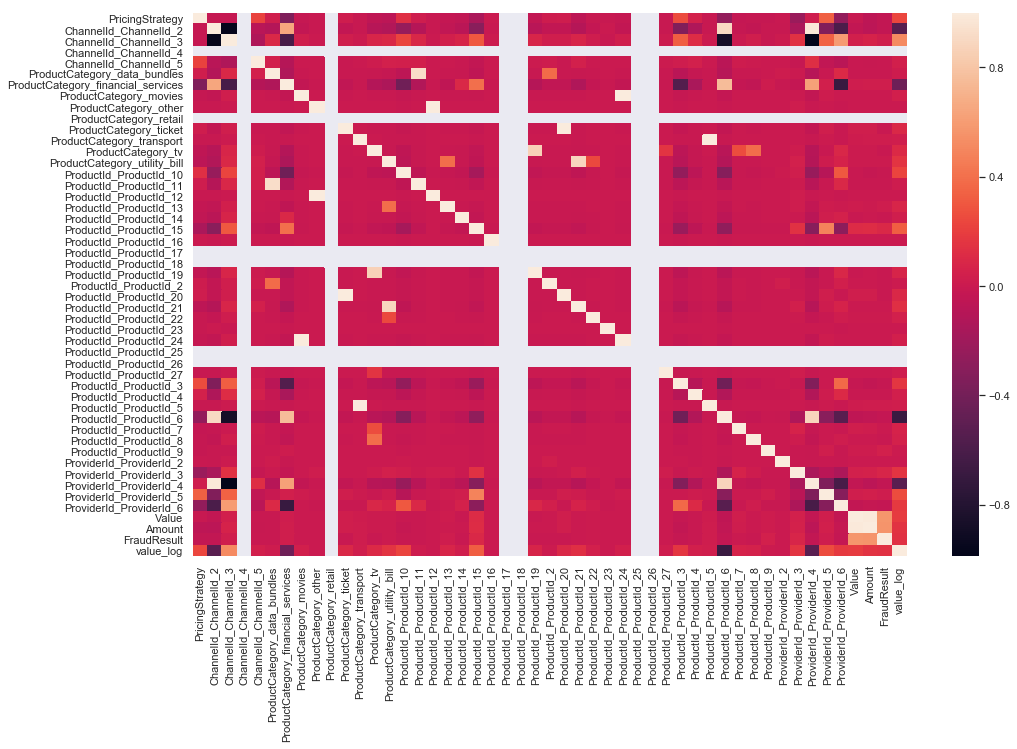

In [48]:
# View attribute correlation
cor = df_features_train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)
plt.show()

In [49]:
corr = df_features_train.corr()
print (corr['FraudResult'].sort_values(ascending=False), '\n')

FraudResult                           1.000000
Value                                 0.566739
Amount                                0.557370
value_log                             0.138169
ProductId_ProductId_15                0.093570
ProviderId_ProviderId_3               0.076205
ProductId_ProductId_9                 0.051832
ChannelId_ChannelId_3                 0.032811
ProductCategory_financial_services    0.032375
ProductCategory_transport             0.028099
ProductId_ProductId_5                 0.028099
ProductId_ProductId_13                0.022662
ProviderId_ProviderId_5               0.022490
ProductCategory_utility_bill          0.013499
ProductId_ProductId_22                0.012086
ProductId_ProductId_21                0.001774
ProductId_ProductId_23               -0.000145
ProductCategory_other                -0.000206
ProductId_ProductId_12               -0.000206
ProductId_ProductId_16               -0.000460
ProviderId_ProviderId_2              -0.000617
ProductId_Pro

The result above shows the positive and negative correlation of attributes with the 'FraudResult' attribute.

#### Split-out Training and Validation dataset

In [50]:
# Create the scaling method.
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
#df_features_train = ss.fit_transform(df_features_train)
#df_features_test = ss.fit_transform(df_features_test)

In [51]:
X = df_features_train.drop(columns=['FraudResult']).values
y = df_features_train['FraudResult']
test_size = 0.20
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#### Evaluate Algorithms: Baseline

In [52]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [53]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
# models.append(( 'NB' , GaussianNB())) poor performance
# models.append(( 'SVM' , SVC()))
models.append(( 'RF' , RandomForestClassifier()))

The algorithms all use default tuning parameters. To be displayed are the mean and standard deviation of accuracy for each algorithm as it is calculated, the results will be collected for later use.

In [54]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998327 (0.000563)
LDA: 0.998158 (0.000580)
KNN: 0.999386 (0.000262)
CART: 0.999334 (0.000353)
RF: 0.999412 (0.000276)


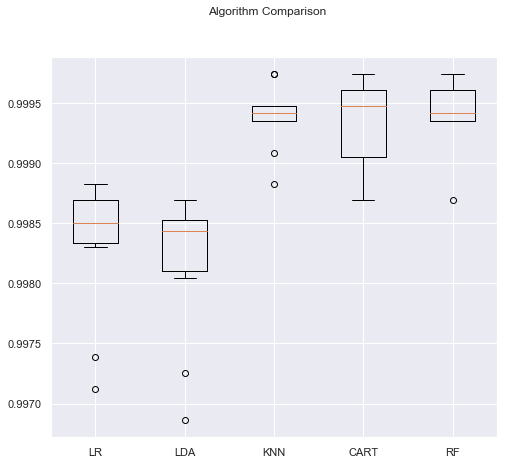

In [55]:
# Compare Algorithms
fig = plt.figure(figsize=(8,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# Make predictions on validation dataset
alg = DecisionTreeClassifier()
alg.fit(X_train, y_train)
predictions = alg.predict(X_test)
print('accuracy_score')
print(accuracy_score(y_test, predictions))
print(' ')
print('confusion_matrix')
print(confusion_matrix(y_test, predictions))
print(' ')
print('classification_report')
print(classification_report(y_test, predictions))

accuracy_score
0.9997386714054252
 
confusion_matrix
[[19095     2]
 [    3    33]]
 
classification_report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19097
         1.0       0.94      0.92      0.93        36

   micro avg       1.00      1.00      1.00     19133
   macro avg       0.97      0.96      0.96     19133
weighted avg       1.00      1.00      1.00     19133



In [57]:
# Use DecisionTreeClassifier model to make predictions on new data

In [58]:
# get TransactionIds
df_submission = df_test[['TransactionId']]

In [59]:
df_features_test.drop(columns=['FraudResult'], inplace=True)

In [60]:
# Make predictions on new dataset
predictions = alg.predict(df_features_test.values)

In [61]:
df_submission['FraudResult'] = predictions

In [62]:
# save data for competition submission
df_submission.to_csv('../data/interim/submission.csv',index=False)

In [63]:
# Notes for conclusion
# Attempt to standardize the Value via np.log gave an f1 score lower than earlier for the "False" class, using KNeighborsClassifier. 
# But values remained same when DecisionTreeClassifier was used
# For further experimentation with KNeighborsClassifier the Value will be used without np.log.
